---  
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>   

### About this document

*This is the assignment for the 2024 UCL CASA module Data Science for Spatial Systems (CASA0006)*  
*This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography.*  

**Code** is hosted [here](URL "可选的标题")  
**Data** is avaliable [here](https://raw.githubusercontent.com/HowieXWH/CASA0006Assignment/main/housing.csv)   

*Word Count:  2309*

---

# Research and analysis of housing prices using random forests and clustering

### *A Case Study of the State of California*

*This article explores the California Census data from the US Census Bureau and uses the Random Forest approach to model the data, which helps to predict housing prices and show the extent to which different factors influence housing prices.*

*Factors that have a high impact on housing prices are then selected and analysed by clustering to find the relevant patterns and to segment the housing market, providing data support and decision-making basis for real estate development, market investment and policy making.*

## 1.0 Introduction

With the rapid growth of the population and economy in California, the housing market has encountered unprecedented challenges. This study employs advanced data analytics and machine learning techniques, such as cluster analysis and random forest models, to analyze and predict trends in the housing market with enhanced precision. These methodologies not only facilitate a deeper understanding of market segmentation and consumer behavior patterns but also enable effective prediction of housing prices and identification of key influencing factors. The objective of this paper is to explore the housing market in California, develop an accurate price prediction model, and perform a detailed segmentation of the housing market, thereby providing robust strategies and insights for sustainable market development.

## 2.0 Literature review

In this literature review, this study provides an in-depth discussion of the application of cluster analysis and random forest models in the field of house price forecasting and market analysis, which serves as a basis for clearly identifying the key topics to be explored in this study.

**Application of Random Forest Modelling to Housing Price Forecasting**

Gerunov (2020) and Khan both found that Random Forest outperformed traditional econometric and other machine learning models, with Khan specifically highlighting its suitability for the Karachi market. Hu (2022) further improved the model by incorporating spatial autocorrelation, leading to more accurate predictions. Fang (2022) also found that Random Forest outperformed other models, particularly in terms of RMSE and goodness of fit. These studies collectively support the use of Random Forest models for housing price forecasting.

**Exploring the use of cluster analysis in housing market analysis**

Cluster analysis, particularly using K-means and DBScan algorithms, has been widely applied in housing market analysis. Abraham (1994) used K-means to identify regional differences in U.S. housing markets, while Guo (2012) employed a new integrated method for time series clustering to categorize growth modes in the Chinese real estate market. Al-Wakeel (2016) developed a clustering module based on K-means for residential smart meter measurements, and Gabrielli (2017) integrated K-means and fuzzy clustering to identify housing submarkets in San Cristoforo, Catania. These studies collectively demonstrate the utility of cluster analysis in understanding the dynamics and segmentation of housing markets.

**Research question**

Although existing research has demonstrated the potential of cluster analysis and random forest models for housing market analysis and price prediction, there is still room for exploration of how to effectively combine these two approaches to deeply analyse the complex and volatile housing market in California and accurately predict housing prices. Therefore, this study aims to answer the following questions:

    RQ1 | Utilizing historical data and a range of economic indicators, can a predictive model be developed to forecast housing price changes across different regions in California?
    RQ2 | What are the key factors influencing housing prices? How can the real estate market in California be segmented based on these factors?

By answering the above research questions, this study expects to provide a more in-depth analytical perspective of the California housing market and provide a scientific basis for related decisions.

## 3.0 Methodology

This study employs two principal data analysis techniques: cluster analysis and random forest regression. Initially, a random forest regression model is constructed to predict the median housing prices across various regions, subsequently identifying the predominant factors influencing these prices. These features are then subjected to cluster analysis to segment the housing market within California into distinct groups. 

**Random Forest Regression**

Random forest is a robust machine learning technique suitable for addressing both regression and classification issues. It enhances the accuracy and robustness of predictions by constructing multiple decision trees and aggregating their outcomes. In this research, the random forest regression model predicts the median housing prices, utilizing socio-economic indicators such as population, median income, median age of housing, and regional classifications derived from cluster analysis as input features. One of the significant advantages of the random forest model is its ability to handle high-dimensional data and provide estimates of feature importance, thereby aiding in the identification of factors that have the most substantial impact on housing prices.

**Cluster Analysis**

Cluster analysis, an exploratory data analysis tool, groups data points into several clusters to reveal the intrinsic structure of the data, making points within the same cluster more similar to each other than to those in other clusters. This research adopts the K-means clustering method, using the significant features identified by the random forest that impact housing prices as the basis for identifying regions within California with similar housing market characteristics. Supplementary methods such as descriptive statistical analysis and geographic location analysis are employed to aid in understanding the geographic and socio-economic segmentation of the housing market, providing a foundation for decision-making.

## 4.0 Data Presentation

### 4.1 Requirements to run the analysis

#### 4.1.1 Configuration environment import

In [1]:
# Load packages used to conduct research analyses.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import pysal as ps            
import seaborn as sns             
import geopandas as gpd
import plotly.express as px       
from math import ceil            
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error

# random forest
from sklearn.ensemble import RandomForestRegressor

# clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

# feature importance
import rfpimp
import libpysal         
import warnings        

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.4f}'.format 
plt.style.use('ggplot') 
%matplotlib inline

In [2]:
# check the library version before we start
print("sklearn version:{}".format(sklearn.__version__))

sklearn version:1.3.0


### 4.2 Data sources and overview

#### 4.2.1 Data sources

This study uses California Census data published by the U.S. Census Bureau, which contains 10 indicators of population, median income, and median housing price for each block group in California. A district or block group is the smallest geographic unit for which the U.S. Census Bureau publishes sample data. There are 20,640 districts in the project dataset.

#### 4.2.2 Data Overview

In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/HowieXWH/CASA0006Assignment/main/housing.csv')

In [60]:
housing.info()

print("""
The indicators included in the dataset are:
1. "longitude" and "lattitude": Indicates the latitude and longitude of each block and is used to capture geographic location information.
2. "housing_median_age": the median age of the housing within a block, reflecting how old or new the housing is.
3. "total_rooms" and "total_bedrooms": represent the total number of rooms and bedrooms of the houses in the block, respectively.
4. "population" and "households": the total population and number of households in the block.
5. "median_income": the median income of the households in the block, which is an indicator of the economic level.
6. "cean_proximity": the location of the block in relation to the ocean, this is a categorical variable containing the categories 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'.
7. "median_house_value": the median housing price within the block, which is the target variable for this study.
""")

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB

The indicators included in the dataset are:
1. "longitude" and "lattitude": Indicates the latitude and longitude of each block and is used to capture geographic location information.
2. "housing_median_age": the median age of the housing within 

## 5.0 Data Exploration

### 5.1 Exploratory Analysis (EDA):


#### 5.1.1 Overview of the dataset

In [5]:
# View data dimensions: get an idea of the size of the dataset, including the number of records and the number of features.
num_rows, num_columns = housing.shape
print("The number of records (rows) in the dataset is:", num_rows)
print("The number of features (columns) of the dataset is:", num_columns)

The number of records (rows) in the dataset is: 20640
The number of features (columns) of the dataset is: 10


In [6]:
# Checking data types
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.2300,37.8800,41,880,129.0000,322,126,8.3252,NEAR BAY,452600
1,-122.2200,37.8600,21,7099,"1,106.0000",2401,1138,8.3014,NEAR BAY,358500
2,-122.2400,37.8500,52,1467,190.0000,496,177,7.2574,NEAR BAY,352100
3,-122.2500,37.8500,52,1274,235.0000,558,219,5.6431,NEAR BAY,341300
4,-122.2500,37.8500,52,1627,280.0000,565,259,3.8462,NEAR BAY,342200


#### 5.1.2 Data cleansing

Handling Missing Values

In [8]:
# Check for missing values in the dataset
missing_values = housing.isnull().sum()

# Display number of missing values
print("The number of missing values in the dataset:")
print(missing_values)

The number of missing values in the dataset:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


Removed rows containing missing values.

In [9]:
# Delete rows containing missing values
housing = housing.dropna()

# Output information about the processed dataset
print("Information about the processed dataset:")
print(housing.info())

Information about the processed dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB
None


#### 5.1.3 Descriptive statistical analysis

In [10]:
# Descriptive statistics: calculate mean, median, standard deviation, minimum, maximum, etc.
summary = housing.describe().round(2)
summary = summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
longitude,"20,433.0000",-119.5700,2.0000,-124.3500,-121.8000,-118.4900,-118.0100,-114.3100
latitude,"20,433.0000",35.6300,2.1400,32.5400,33.9300,34.2600,37.7200,41.9500
housing_median_age,"20,433.0000",28.6300,12.5900,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,"20,433.0000","2,636.5000","2,185.2700",2.0000,"1,450.0000","2,127.0000","3,143.0000","39,320.0000"
total_bedrooms,"20,433.0000",537.8700,421.3900,1.0000,296.0000,435.0000,647.0000,"6,445.0000"
population,"20,433.0000","1,424.9500","1,133.2100",3.0000,787.0000,"1,166.0000","1,722.0000","35,682.0000"
households,"20,433.0000",499.4300,382.3000,1.0000,280.0000,409.0000,604.0000,"6,082.0000"
median_income,"20,433.0000",3.8700,1.9000,0.5000,2.5600,3.5400,4.7400,15.0000
median_house_value,"20,433.0000","206,864.4100","115,435.6700","14,999.0000","119,500.0000","179,700.0000","264,700.0000","500,001.0000"


**Histograms**

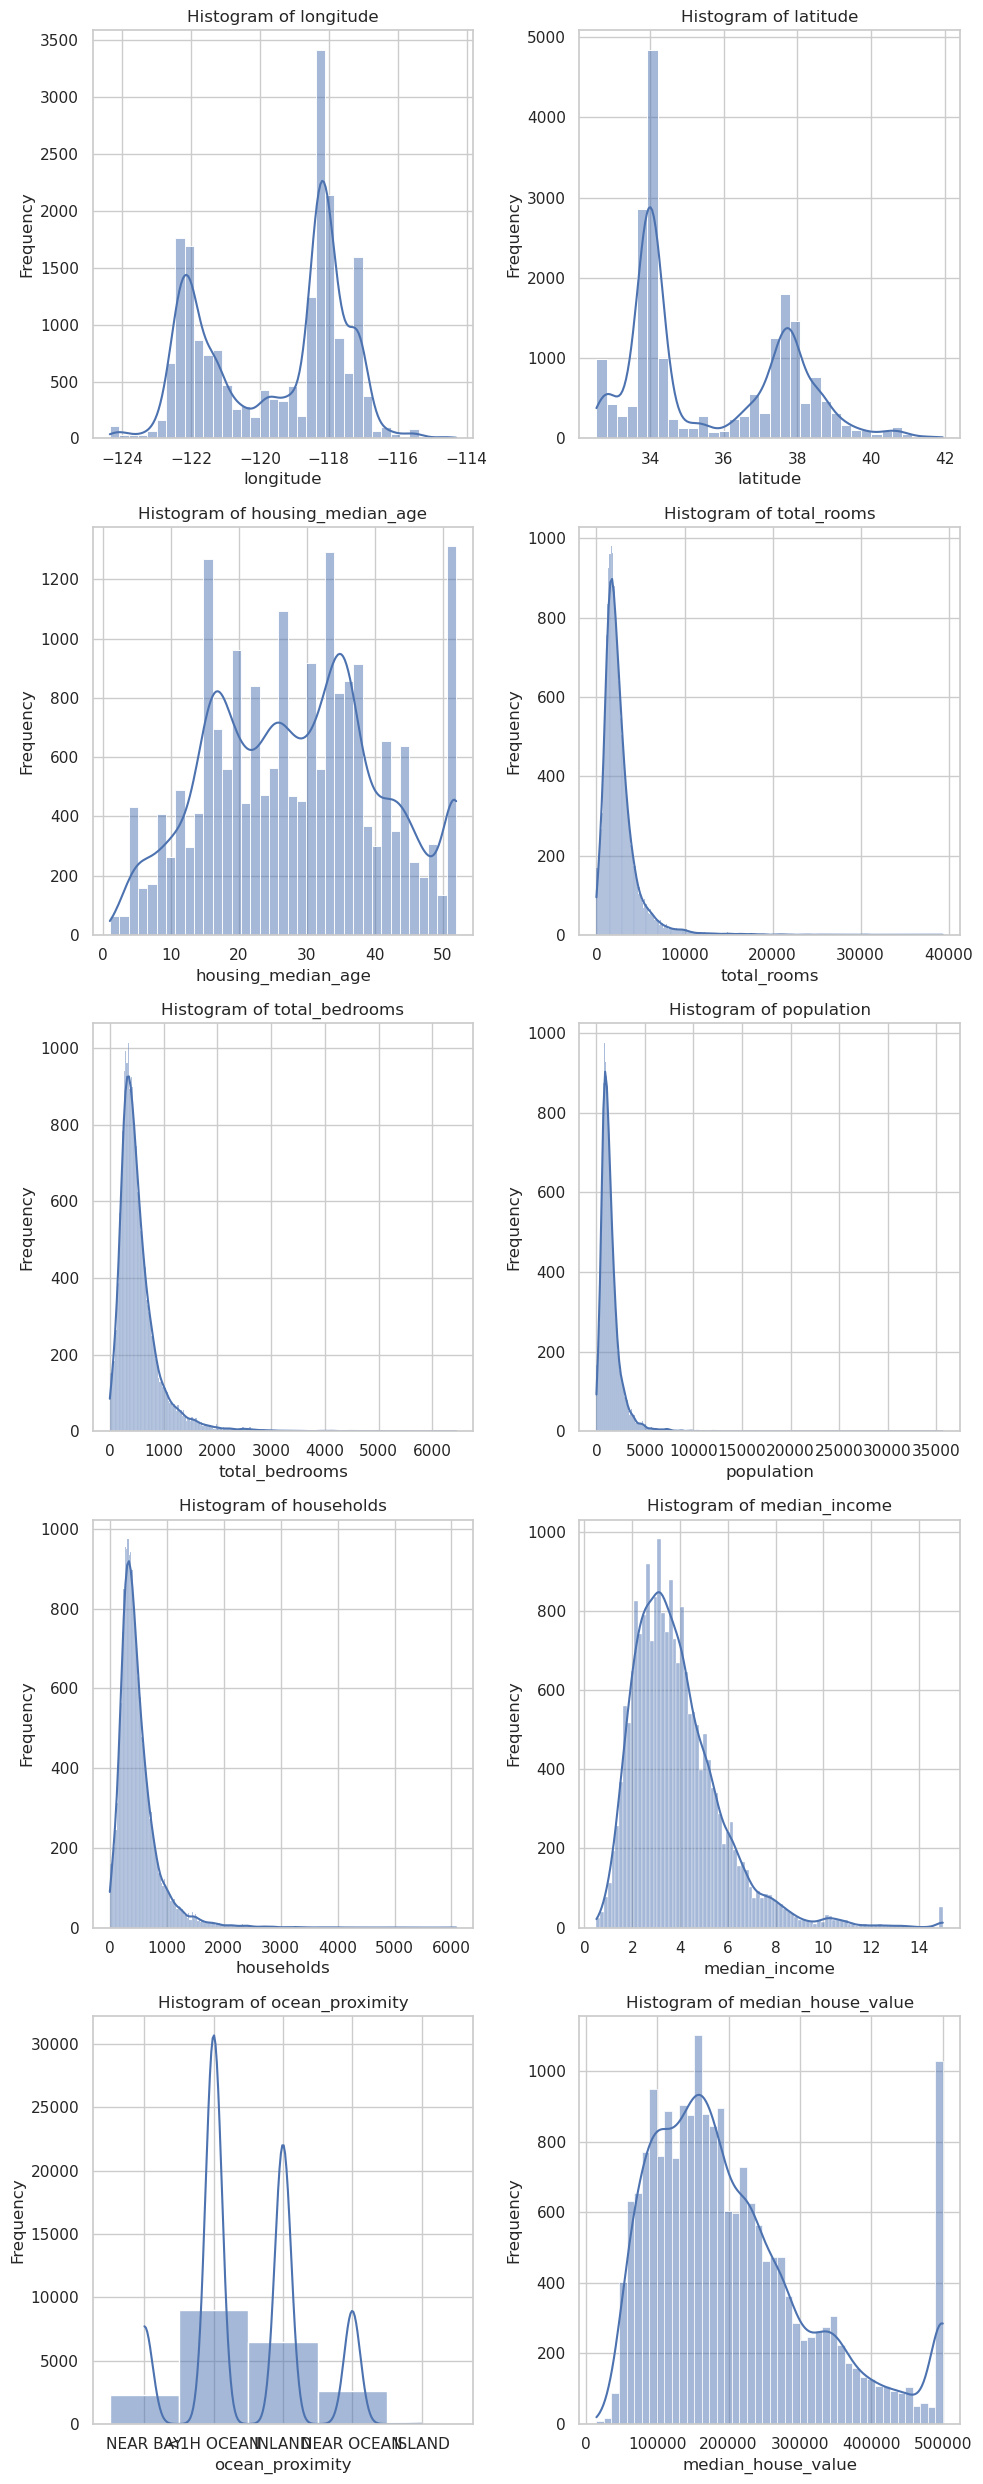

In [37]:
# view the distribution of variables and identify skewness and kurtosis.
# Get all column names
columns = housing.columns

# Setting up the subgraph layout
num_cols = 2 
num_rows = (len(columns) - 1) // num_cols + 1

# Setting the graphic size
plt.figure(figsize=(10, 5*num_rows))

# Iterate over all columns and plot histograms
for i, column_name in enumerate(columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(housing[column_name], kde=True)
    plt.title('Histogram of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Geographic information dimensions**

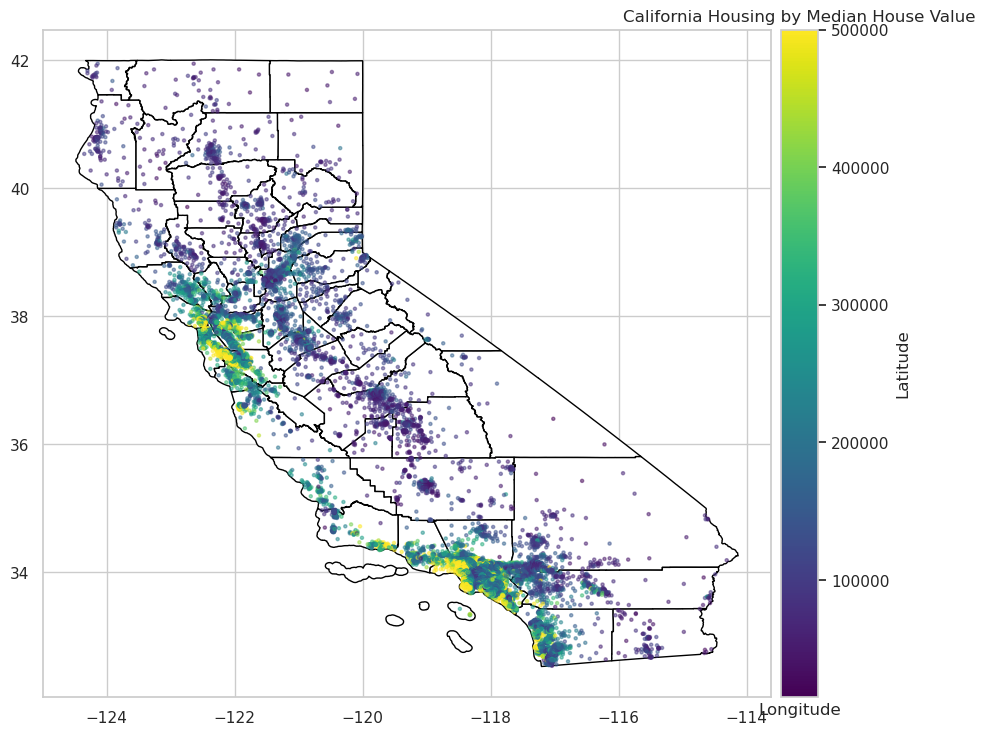

In [51]:
data = housing

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.longitude, data.latitude)
)

# GeoDataFrame of the California Boundary
california_boundary = gpd.read_file('ca_county_boundaries')

fig, ax = plt.subplots(figsize=(10, 10))
california_boundary.plot(ax=ax, color='white', edgecolor='black')

# Set the normalisation of the colour mapping
norm = Normalize(vmin=gdf['median_house_value'].min(), vmax=gdf['median_house_value'].max())

# Set the normalisation of the colour mapping
cmap = 'viridis'
sm = ScalarMappable(norm=norm, cmap=cmap)

# Plot the points and colour code them using median_house_value
scatter = gdf.plot(column='median_house_value', ax=ax, cmap=cmap, 
                   markersize=5, alpha=0.5)

# Add colour bars to maps
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(sm, cax=cax, label='Median House Value')

plt.title('California Housing by Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Brief analysis
- High home prices are concentrated near the coastline, especially around metropolitan areas such as the San Francisco Bay Area and around Los Angeles.
- Low home prices seem to be more inland.
- There appears to be a gradual decrease in median home prices from the coastline inland.

## 6.0 Data Analysis

This research developed a predictive model for California housing values using the random forest algorithm. The algorithm's feature importance evaluation significantly aids in quantifying and identifying variables that have a substantial impact on the median housing prices. These identified variables not only assist in constructing the predictive model but also lay a solid foundation for subsequent cluster analysis.Furthermore, employing cluster analysis on this basis has unveiled natural groupings within the housing price data across multi-dimensional feature spaces, thereby exploring the distribution patterns and inherent laws of the California housing market.

### 6.1 Random Forest Algorithm Analysis:

#### 6.1.1 Data loading and preliminary exploration

In [52]:
# Load the dataset.
# Check the basic characteristics of the data, such as the number of rows, columns, and data types.
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


#### 6.1.2 Data pre-processing

One-Hot Encoding

In [63]:
# The analysis of this research uses One-Hot Encoding to transform these variables. 
housing_dum = pd.get_dummies(housing)
housing_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  int64  
 3   total_rooms                 20433 non-null  int64  
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  int64  
 6   households                  20433 non-null  int64  
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20433 non-null  bool   
 10  ocean_proximity_INLAND      20433 non-null  bool   
 11  ocean_proximity_ISLAND      20433 non-null  bool   
 12  ocean_proximity_NEAR BAY    20433 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  20433 no

Choose the reference level

In [64]:
# Similar variables consisting of K categories or levels usually enter the regression as a sequence of K-1 dummy variables. 
# Manually select the reference level for each categorical variable and exclude it from the DataFrame.
housing_dum = housing_dum.drop(['longitude', 'latitude', 'ocean_proximity_<1H OCEAN'], axis=1)

# double check the result
housing_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20433 non-null  int64  
 1   total_rooms                 20433 non-null  int64  
 2   total_bedrooms              20433 non-null  float64
 3   population                  20433 non-null  int64  
 4   households                  20433 non-null  int64  
 5   median_income               20433 non-null  float64
 6   median_house_value          20433 non-null  int64  
 7   ocean_proximity_INLAND      20433 non-null  bool   
 8   ocean_proximity_ISLAND      20433 non-null  bool   
 9   ocean_proximity_NEAR BAY    20433 non-null  bool   
 10  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
dtypes: bool(4), float64(2), int64(5)
memory usage: 1.3 MB


#### 6.1.3 Delineation of the data set

In [53]:
# The data was randomly partitioned into training and test sets in the ratio of 75% and 25%.
# By setting the random_state parameter to 100, this study ensures the reproducibility of the results.
# The input consists of two data frames (X and Y, respectively), and the output is four datasets: train_x, test_x, train_y, and test_y, representing the training feature set, test feature set, training target set, and test target set, respectively.

random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(housing_dum.drop(['median_house_value'], axis = 1), housing_dum.median_house_value, random_state=random_state_split)

In [54]:
# Double check the rows and columns of the outputs.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(15324, 10)
(15324,)
(5109, 10)
(5109,)
True
True


#### 6.1.4 Training the random forest model

In this section, we will use the Random Forest approach to predict house prices in California.    

In [18]:
# This code will focus on adjusting max_depth and min_samples_split.
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
rf = RandomForestRegressor(random_state = randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(rf, hyperparameters, error_score='raise')
clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 30, 'min_samples_split': 10}
The best score is: 
0.714557147987821


In [19]:
rf_final = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
rf_final.fit(train_x, train_y)

RandomForestRegressor(max_depth=30, min_samples_split=10, random_state=10000)

#### 6.1.5 Feature importance view

                                                         Importance
Feature                                                            
median_income                                                0.9511
population                                                   0.2898
total_bedrooms                                               0.2130
ocean_proximity_INLAND                                       0.1804
housing_median_age                                           0.1153
households                                                   0.0452
total_rooms                                                  0.0349
ocean_proximity_NEAR OCEAN                                   0.0039
ocean_proximity_NEAR BAY                                     0.0031
ocean_proximity_ISLAND                                       0.0000


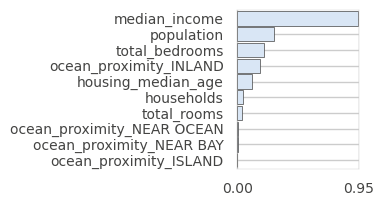

In [65]:
# Obtain the importance of each feature in the random forest model.
imp = rfpimp.importances(rf_final, test_x, test_y)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

In this chart it can be simply seen that: **median income** and **population** are in the top two places in terms of their impact on house prices.

### 6.2 Cluster analysis:：

#### 6.2.1 Selection of characteristics

Based on these results from the Random Forest model, it is expected that the variables of **population**, **median income** and **median house price** will be used as input variables for the cluster analysis feature to effectively segment and explain the different segments of the housing market.

In [21]:
# Select specific columns for the new dataframe
columns_selected = ['longitude', 'latitude', 'population', 'median_income', 'median_house_value']
housing_select = housing[columns_selected]

# Display the first few rows of the new dataframe to confirm the selection
housing_select.head()

,longitude,latitude,population,median_income,median_house_value
0,-122.2300,37.8800,322,8.3252,452600
1,-122.2200,37.8600,2401,8.3014,358500
2,-122.2400,37.8500,496,7.2574,352100
3,-122.2500,37.8500,558,5.6431,341300
4,-122.2500,37.8500,565,3.8462,342200


#### 6.2.2 Handling of missing values

The rows containing missing values have been removed in the methodology used to conduct the exploratory analysis. 

#### 6.2.3 Data standardisation

Prior to performing the cluster analysis, it was crucial that standardisation was implemented on the selected variables given the high sensitivity of this analytical method to the scale of the data. Z-score standardisation was used in this study.


In [66]:
from scipy.stats import zscore
housing_select_normal = housing_select.copy()
# Apply Z-score normalization to the specified columns
columns_to_normalize = ['population', 'median_income', 'median_house_value']
housing_select_normal[columns_to_normalize] = housing_select_normal[columns_to_normalize].apply(zscore)

# Display the first few rows to confirm the normalization
housing_select_normal.head()

,longitude,latitude,population,median_income,median_house_value
0,-122.2300,37.8800,-0.9733,2.3452,2.1288
1,-122.2200,37.8600,0.8613,2.3326,1.3136
2,-122.2400,37.8500,-0.8198,1.7829,1.2582
3,-122.2500,37.8500,-0.7651,0.9330,1.1646
4,-122.2500,37.8500,-0.7589,-0.0131,1.1724


#### 6.2.4 Determining the number of clusters

The current study used the elbow rule to determine the number of clusters, which was manipulated by calculating the total sum of squares (SSE) within each possible number of clusters (k).

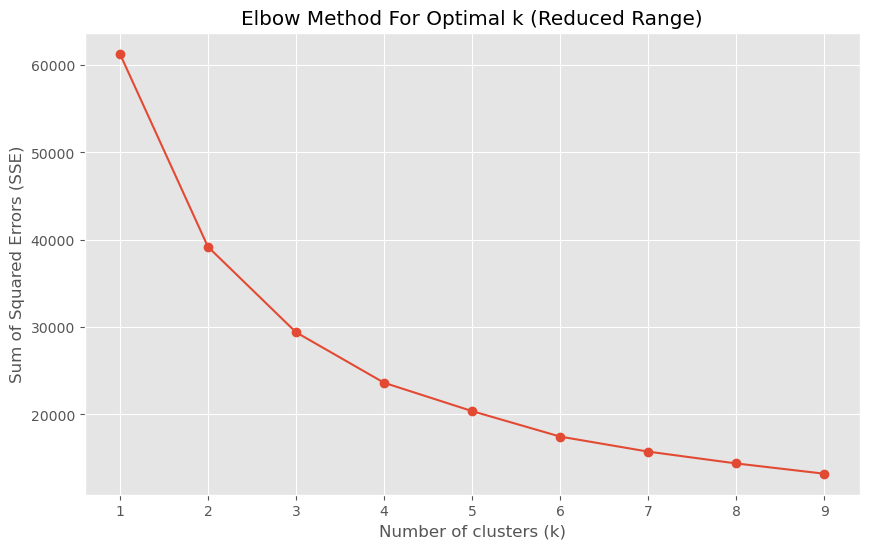

(None,
 [61298.99999999992,
  39195.46149531759,
  29407.391861327873,
  23627.21553900066,
  20379.82379320019,
  17461.346695702385,
  15742.511316604154,
  14387.625667210576,
  13213.200954467811])

In [23]:
SEE_data = housing_select_normal[['population', 'median_income', 'median_house_value']]
# Attempt a more streamlined approach with a reduced range of k values to ensure it runs smoothly
# We'll use a smaller subset of k values for a quicker calculation

# Define a smaller range of k values to try
k_values_reduced = range(1, 10)

# Calculate SSE for each k value in the reduced range
sse_reduced = []
for k in k_values_reduced:
    kmeans_reduced = KMeans(n_clusters=k, random_state=42)
    kmeans_reduced.fit(SEE_data)
    sse_reduced.append(kmeans_reduced.inertia_)

# Plotting the SSE values for the reduced range of k
plt.figure(figsize=(10, 6))
plt.plot(k_values_reduced, sse_reduced, marker='o')
plt.title('Elbow Method For Optimal k (Reduced Range)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show(), sse_reduced

**ELBOW POINT SELECTION :**   
The decline of SSE slows down near the elbow plot k = 3, so we choose it as the number of clusters.

#### 6.2.5 Performing clustering

In [67]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(SEE_data)

# Add clustering results to a copy of the original data
data_with_clusters = housing.copy()  
data_with_clusters['Cluster'] = clusters

## 7.0 Results and Discussion


### 7.1 Analysis of random forest results

#### 7.1.1 Model evaluation

In this subsection, we will evaluate the performance of the model on the training data by means of R². This metric reflects the proportion of the variance of the model's predicted values that matches the actual values, thus quantifying the accuracy of the model in fitting the data. By comparing the R² values of the training and test sets, we can make an initial assessment of the model's generalisation ability and potential risk of overfitting.

In [26]:
print("R2 on the training data:")
print(rf_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(rf_final.score(X=test_x, y=test_y))

R2 on the training data:
0.904745251678113
R2 on the testing data:
0.7171337154488306


**R² on the training set :** 0.9047 indicates that the model fits the data well on the training set, explaining most of the variance.  
**R² on the test set :** 0.7171 indicates that the model's performance on the unseen data has decreased, but still explains more than 70% of the variance, which can usually be considered a better result. 

#### 7.1.2 Feature importance analysis

                                                         Importance
Feature                                                            
median_income                                                0.9431
population                                                   0.2602
total_bedrooms                                               0.2351
ocean_proximity_INLAND                                       0.2141
housing_median_age                                           0.1137
households                                                   0.0445
total_rooms                                                  0.0368
ocean_proximity_NEAR OCEAN                                   0.0057
ocean_proximity_NEAR BAY                                     0.0029
ocean_proximity_ISLAND                                       0.0000


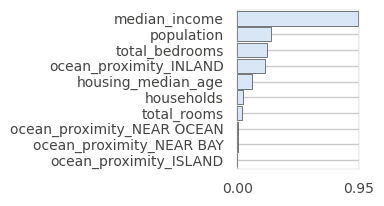

In [83]:
# Obtain and analyse the importance of each feature in the random forest model.
imp = rfpimp.importances(rf_final, test_x, test_y)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

This graph shows:

- **median_income :** has the highest importance score, which means that it plays a decisive role in the model prediction. 

- **population and total_bedrooms :** have a higher importance score. They also play an important role in predicting house prices, but are less influential than household income.

- **housing_median_age, households, total_rooms :** have lower importance scores, indicating that they contribute less to the model, but still have some influence.

### 7.2 Analysis of clustering results

In [28]:
data_with_clusters

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Cluster
0,-122.2300,37.8800,41,880,129.0000,322,126,8.3252,NEAR BAY,452600,1
1,-122.2200,37.8600,21,7099,"1,106.0000",2401,1138,8.3014,NEAR BAY,358500,1
2,-122.2400,37.8500,52,1467,190.0000,496,177,7.2574,NEAR BAY,352100,1
3,-122.2500,37.8500,52,1274,235.0000,558,219,5.6431,NEAR BAY,341300,1
4,-122.2500,37.8500,52,1627,280.0000,565,259,3.8462,NEAR BAY,342200,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.0900,39.4800,25,1665,374.0000,845,330,1.5603,INLAND,78100,2
20636,-121.2100,39.4900,18,697,150.0000,356,114,2.5568,INLAND,77100,2
20637,-121.2200,39.4300,17,2254,485.0000,1007,433,1.7000,INLAND,92300,2
20638,-121.3200,39.4300,18,1860,409.0000,741,349,1.8672,INLAND,84700,2


In [84]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(SEE_data)

# Add clustering results to a copy of the original data
data_with_clusters = housing.copy()  
data_with_clusters['Cluster'] = clusters

# View the size of each cluster
print(data_with_clusters['Cluster'].value_counts())

Cluster
2    13516
1     5150
0     1767
Name: count, dtype: int64


#### 7.2.1 Clustering results were analysed with descriptive statistics

In [85]:
# Descriptive Statistics: This provides a deeper look into the distribution of the features within each cluster.
import pandas as pd
from sklearn.cluster import KMeans

# Calculating descriptive statistics for each cluster
for cluster in sorted(data_with_clusters['Cluster'].unique()):
    print(f"\nDescriptive Statistics for Cluster {cluster}:")
    print(data_with_clusters[data_with_clusters['Cluster'] == cluster][['population', 'median_income', 'median_house_value']].describe())


Descriptive Statistics for Cluster 0:
                                    population  \
count                               1,767.0000   
mean                                4,035.0198   
std                                 1,926.3002   
min                                 2,399.0000   
25%                                 2,948.5000   
50%                                 3,438.0000   
75%                                 4,450.0000   
max                                35,682.0000   

                                 median_income  \
count                               1,767.0000   
mean                                    3.7327   
std                                     1.3342   
min                                     0.4999   
25%                                     2.7252   
50%                                     3.6230   
75%                                     4.6003   
max                                    10.2264   

                            median_house_value  
count     

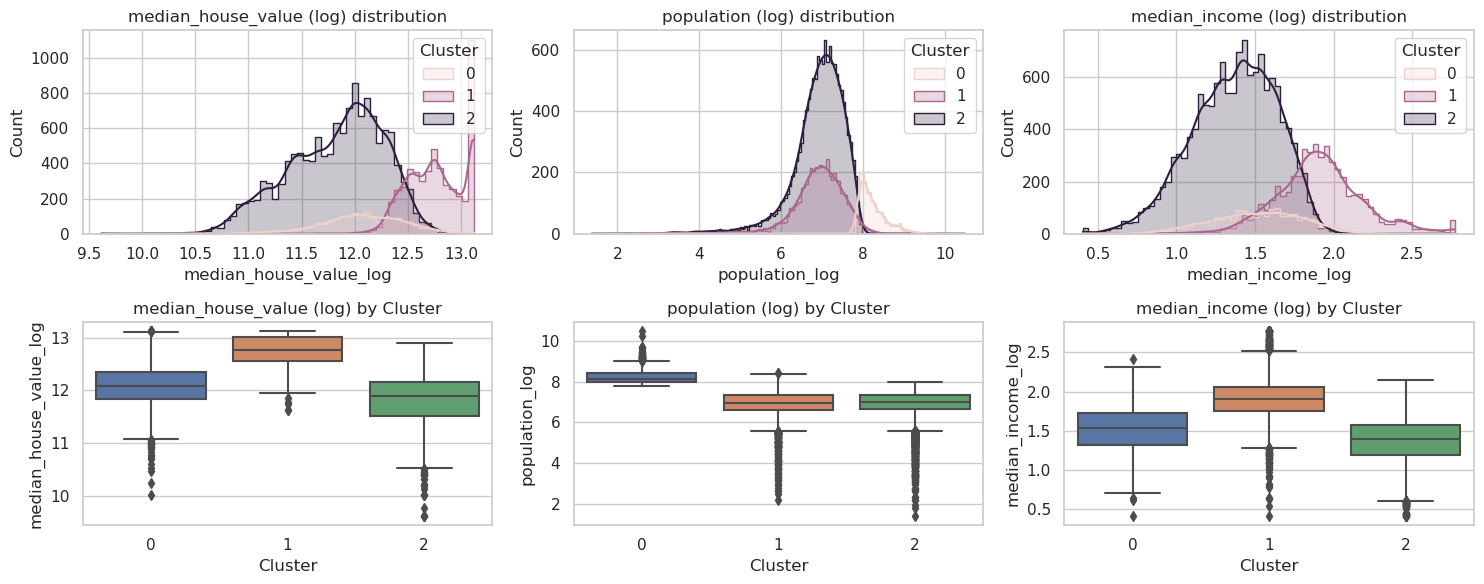

In [32]:
# Visualising clustering information using histograms
data = data_with_clusters

# Selection of features to be log-transformed
selected_features = ['population', 'median_income', 'median_house_value']

# Logarithmic conversion of selected features
for feature in selected_features:
    # Add 1 to avoid taking logarithms of zeroes
    data[f'{feature}_log'] = np.log(data[feature] + 1)

# Plotting histograms and box plots of specified three features
specified_features = ['median_house_value', 'population', 'median_income']

# Set the chart size and style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Create histograms and box plots for each specific feature
for i, feature in enumerate(specified_features, 1):
    # Plotting histograms
    plt.subplot(2, len(specified_features), i)
    sns.histplot(data, x=f'{feature}_log', hue='Cluster', element='step', kde=True)
    plt.title(f'{feature} (log) distribution')

    # Plotting box lines
    plt.subplot(2, len(specified_features), len(specified_features) + i)
    sns.boxplot(x='Cluster', y=f'{feature}_log', data=data)
    plt.title(f'{feature} (log) by Cluster')

plt.tight_layout()
plt.show()

**Cluster Analysis** 

Cluster 0
- Population: the average population in this cluster is large, with a mean of about 4,035, but with a large variance, suggesting that the regional population distributions in this cluster may vary widely.
- Median Income: Medium income levels, with a mean median income of about \$37,327, suggests that the occupants of this cluster are of medium economic status.
- Median Home Value: median home values are relatively low, averaging \$189,604 and ranging from \$22,500 to \$50,001, suggesting that home values are also widely distributed.

Cluster 1
- Population: This cluster has a low average population, with a mean of about 1,182, and a relatively even distribution of population (standard deviation of about 638).
- Median Income: This cluster has a higher average median income of about \$60,315, indicating that the occupants of this cluster are relatively affluent.
- Median Home Value: The median home value is the highest of the three clusters, averaging $361,440, which may reflect the effects of higher income levels and lower population density.

Cluster 2
- Population: Population size is similar to Cluster 1, with an average value of approximately 1,176, but this cluster has a narrower range of populations (maximum population of 2,865).
- Median Income: The average median income is the lowest at approximately \$30,661, suggesting that this cluster may contain areas with lower economic levels.
- Median Home Value: the lowest median home value, averaging $150,223, corresponds with lower income levels.

**Summary Inference**
- Cluster 1 represent more economically developed neighbourhoods with higher home values and lower population densities. **[ High-Value Housing Neighbourhoods ]**
- Cluster 2 represent neighbourhoods that are less economically developed, have lower house prices and relatively even population densities. **[ Low-Value Housing Neighbourhoods ]**
- Cluster 0 represent an in-between area, or to consist of areas with large differences in population size, and with economic levels and house prices between Cluster 1 and Cluster 2. **[ Medium-Value Mixed Neighbourhoods ]**

#### 7.2.2 Geographical distribution analysis of clustering results

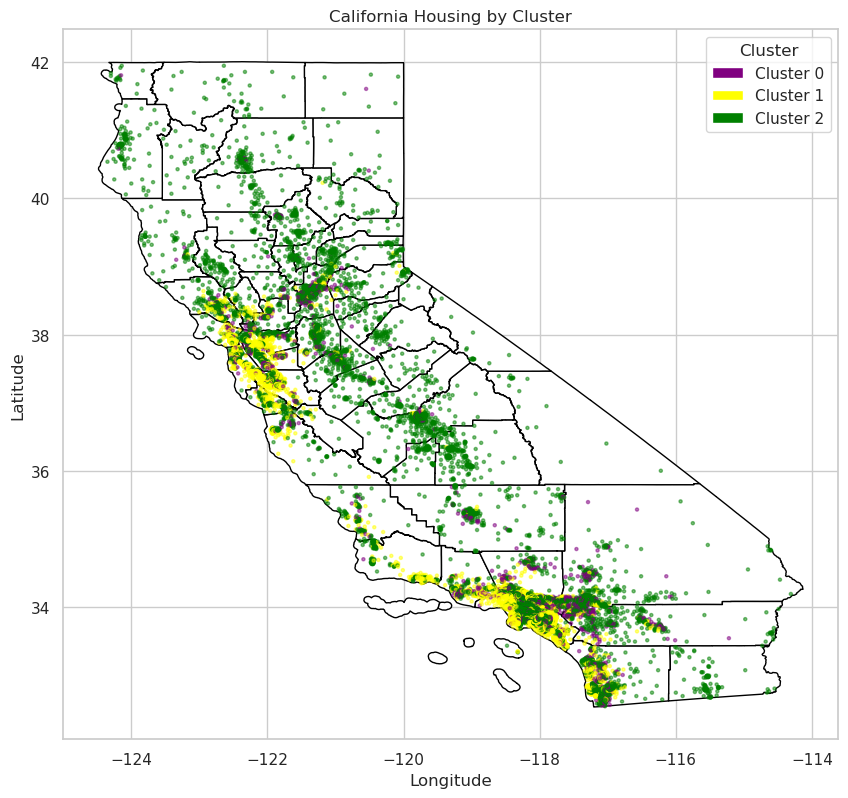

In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = data_with_clusters

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data.longitude, data.latitude)
)

# Load GeoDataFrame with California State Boundaries
california_boundary = gpd.read_file('ca_county_boundaries')

# Create maps
fig, ax = plt.subplots(figsize=(10, 10))
california_boundary.plot(ax=ax, color='white', edgecolor='black')

# Define the colour mapping for clustering
cluster_colors = {
    0: 'purple',
    1: 'yellow',
    2: 'green'
}

# Create a list of colours and labels for the legend
legend_labels = [Patch(facecolor=cluster_colors[i], label=f'Cluster {i}') for i in cluster_colors]

# Plotting of points based on clustering results
scatter = gdf.plot(column='Cluster', ax=ax, categorical=True,
                   color=gdf['Cluster'].map(cluster_colors),
                   markersize=5, alpha=0.5)

# Add Legends
ax.legend(handles=legend_labels, title='Cluster')

# Setting up titles and axis labels
plt.title('California Housing by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**This map allows for a simple analysis**
- High-value housing areas (Cluster 1) are mainly clustered in areas close to the coastline, especially around metropolitan areas such as the San Francisco Bay Area and the Los Angeles area. This may be related to the high concentration of economic activity, amenities, accessibility, and scenic or pleasant climate in these areas.
- Low-value housing areas (Cluster 2) appear to be more inland. These areas may be far from major economic centres and may have lower house prices as a result.
- Different levels of clustering information appear from coastal to inland, reflecting the relationship between California's housing market and geographic location. And while coastal areas typically have higher house prices, this trend declines as one moves inland.

## 8.0 Conclusion

In summary, this paper performs random forest and cluster analyses on data related to house prices in California, aiming to answer the following research questions, each of which is addressed below:

    RQ1 | Utilizing historical data and a range of economic indicators, can a predictive model be developed to forecast housing price changes across different regions in California?
    RQ2 | What are the key factors influencing housing prices? How can the real estate market in California be segmented based on these factors?
Q1: In this study, we developed a random forest model to predict housing prices in California. Upon testing, the model demonstrated high predictive accuracy, effectively forecasting housing prices. This indicates that the random forest model is highly capable and reliable for such predictive tasks.   
Q2: In this study, we discovered that median income and population size are the major factors influencing housing prices in California. Based on these factors, we segmented California's real estate market into three main categories: High Value Housing Neighbourhoods, Medium Value Mixed Neighbourhoods, and Low-Value Housing Neighbourhoods. This classification has been visually presented in geographical dimensions, effectively revealing the relationship between housing price levels and socio-economic characteristics across different regions.  


By segmenting the real estate market into distinct categories, this study provides valuable insights into the varied landscape of housing affordability and market behavior across California. These findings not only enhance our understanding of the housing market's complexity but also offer a practical framework for stakeholders to make informed decisions.


## References

Gerunov A. Machine Learning Algorithms For Forecasting Asset Prices: An Application To The Housing Market[J]. Икономика и управление, 2020, 17(1): 27-42.

Hu L, Chun Y, Griffith D A. Incorporating spatial autocorrelation into house sale price prediction using random forest model[J]. Transactions in GIS, 2022, 26(5): 2123-2144.

Fang Y, Li T, Zhao H. Random forest model for the house price forecasting[C]//2022 14th International Conference on Computer Research and Development (ICCRD). IEEE, 2022: 140-143.

Abraham J M, Goetzmann W N, Wachter S M. Homogeneous groupings of metropolitan housing markets[J]. Journal of Housing Economics, 1994, 3(3): 186-206.

Guo K, Wang J, Shi G, et al. Cluster analysis on city real estate market of China: based on a new integrated method for time series clustering[J]. Procedia Computer Science, 2012, 9: 1299-1305.

Al-Wakeel A, Wu J. K-means based cluster analysis of residential smart meter measurements[J]. Energy Procedia, 2016, 88: 754-760.

Gabrielli L, Giuffrida S, Trovato M R. Gaps and overlaps of urban housing sub-market: hard clustering and fuzzy clustering approaches[J]. Appraisal: From Theory to Practice: Results of SIEV 2015, 2017: 203-219.